the problem is about predicat bulldozer price 

In [45]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as py
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import joblib

import data

In [2]:
bulldozer=pd.read_csv('data\\TrainAndValid.csv',low_memory=False)

* after read data dict i have a good understanding of how data will be preproces and this will complete after EDA

In [4]:
print(bulldozer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [153]:
bulldozer.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


<Axes: xlabel='SalePrice', ylabel='Count'>

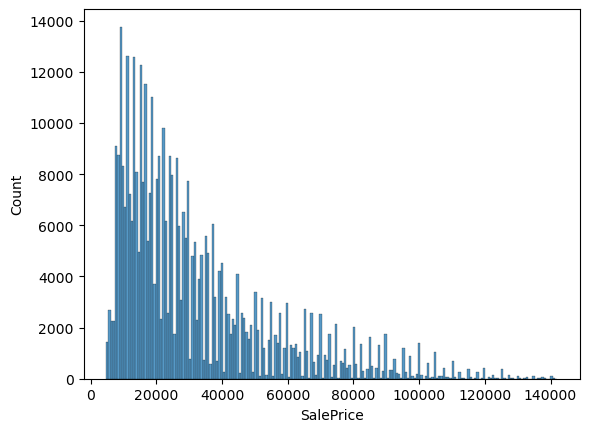

In [154]:
sns.histplot(bulldozer.SalePrice)

<Figure size 5000x5000 with 0 Axes>

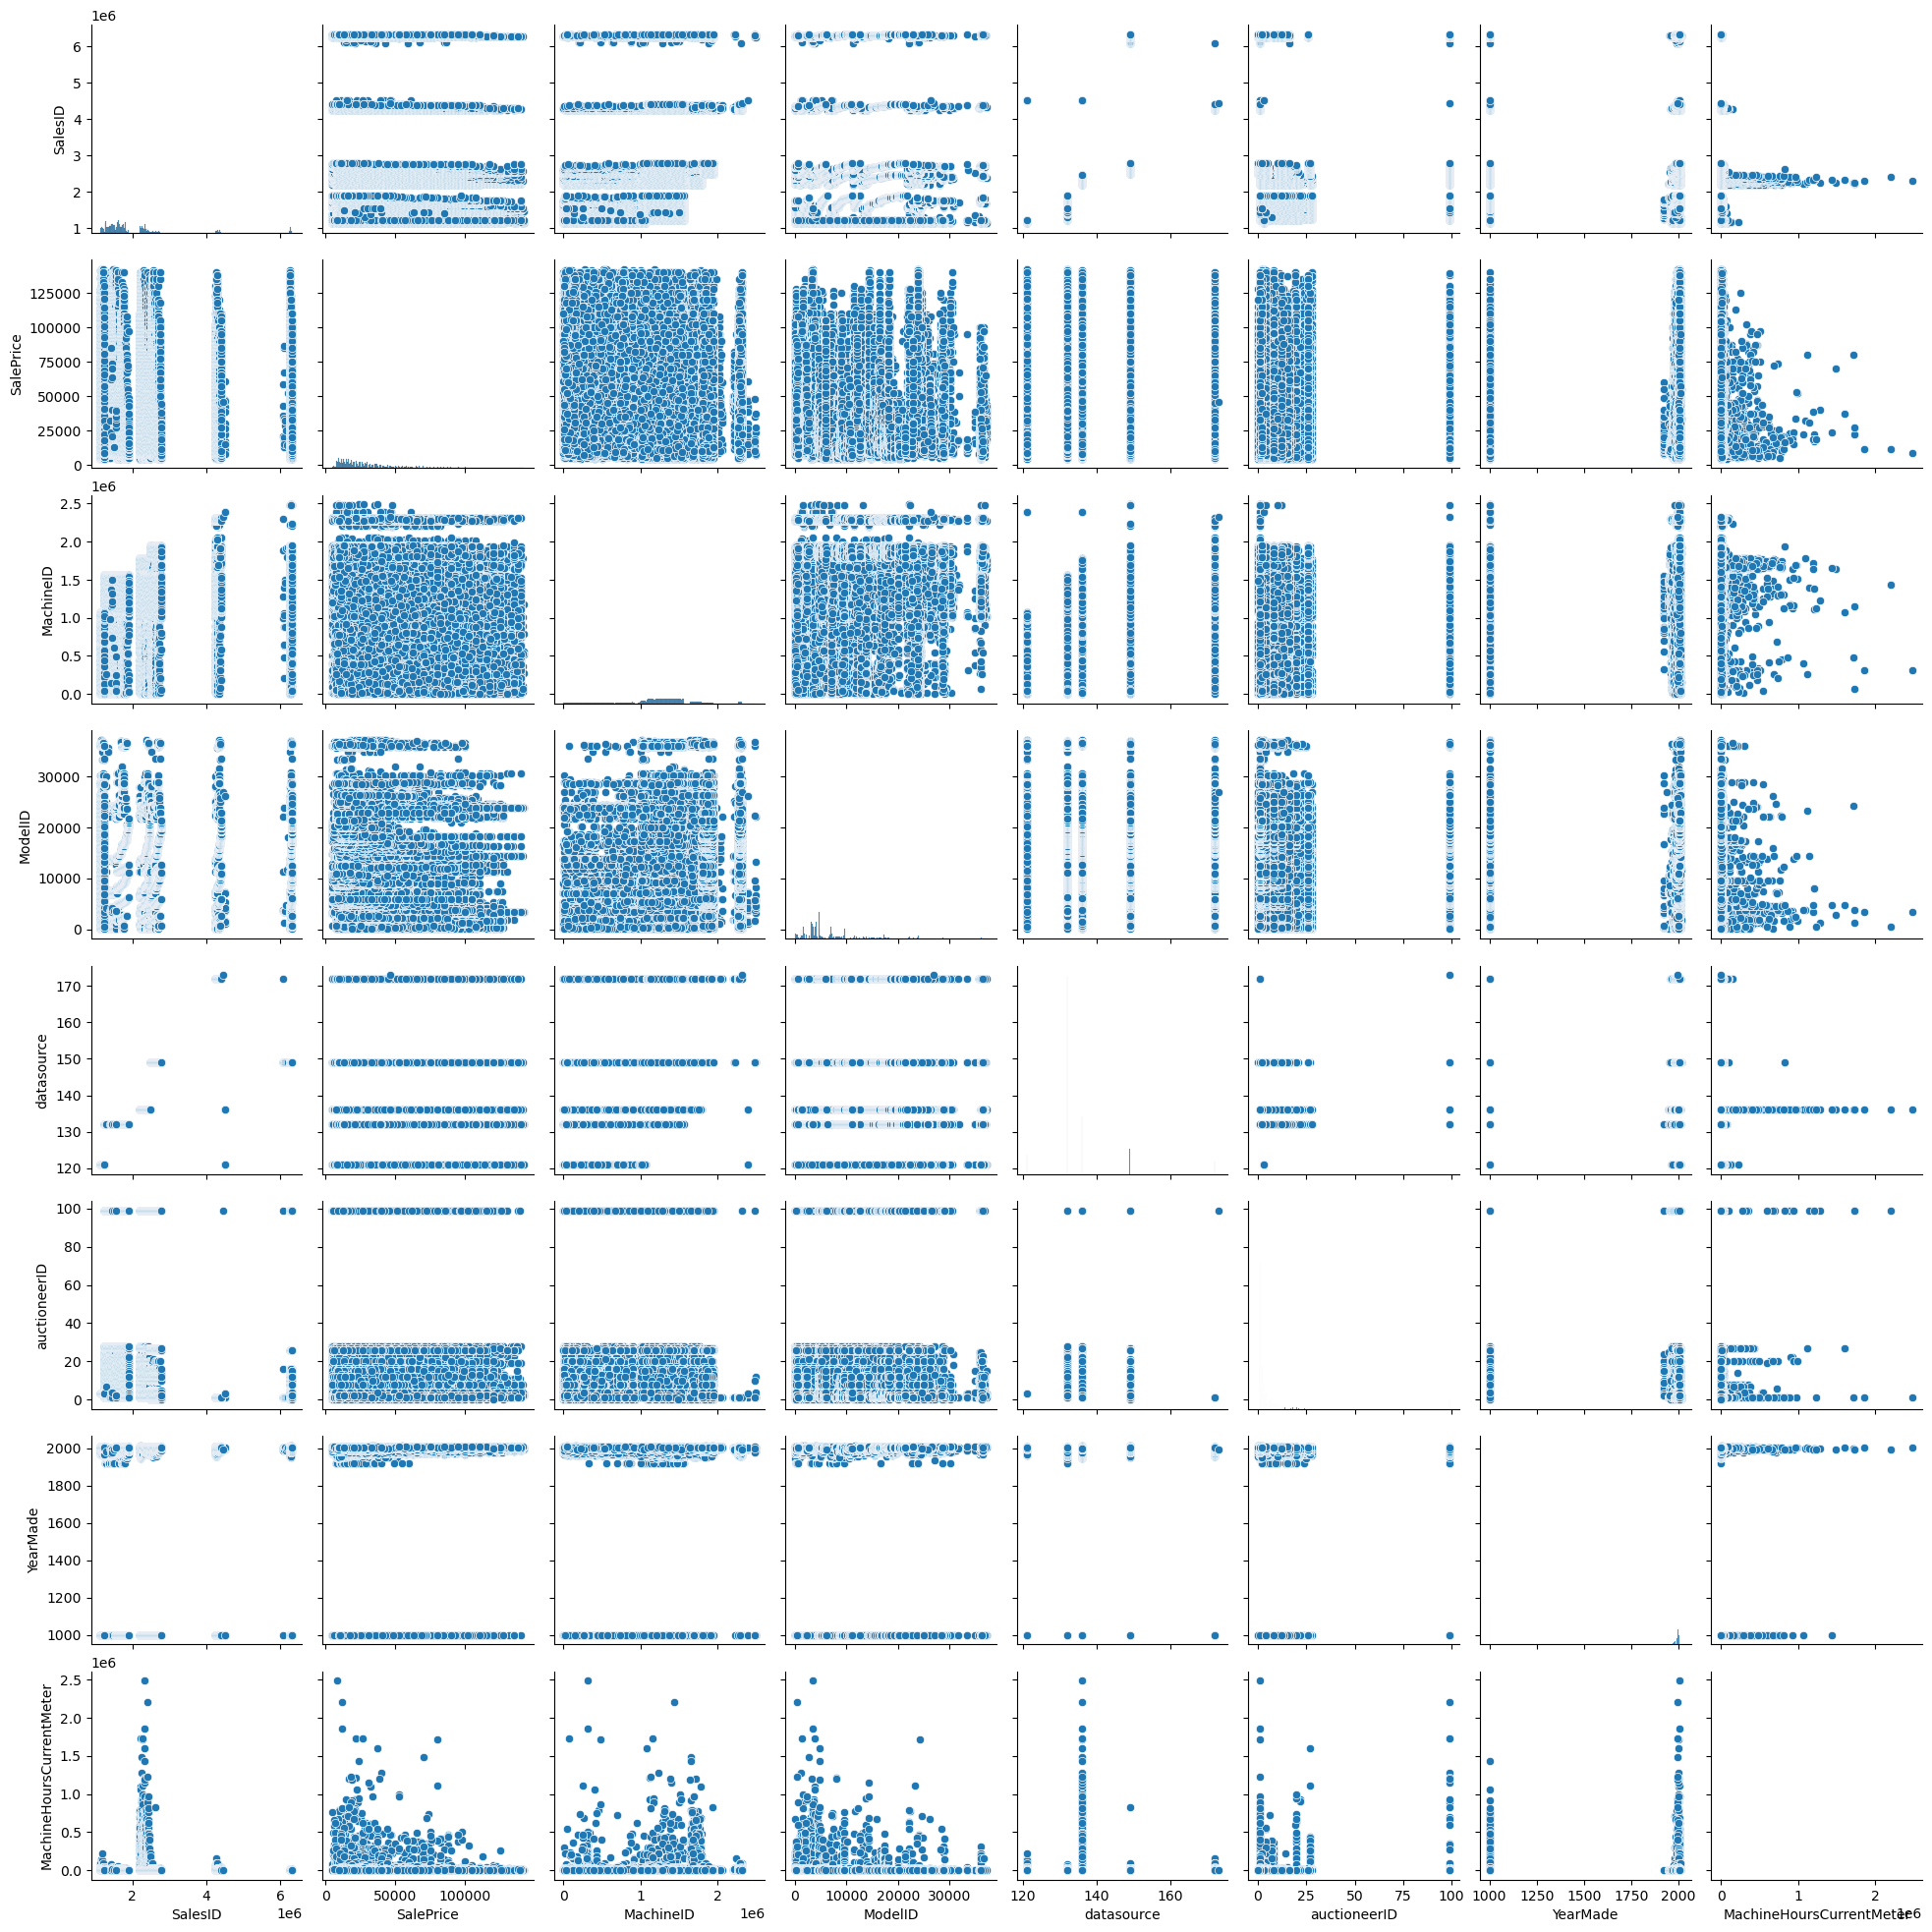

In [93]:
plt.figure(figsize=(50,50))
sns.pairplot(bulldozer)

* no numeric column  well correlated with target  Column
* i see in some notebook that add new column from sale date column and i think that is usefull

In [5]:
bulldozer.saledate=pd.to_datetime(bulldozer.saledate)
bulldozer.sort_values(by=['saledate'],inplace=True)

In [6]:
bulldozer['saleYear']=bulldozer.saledate.dt.year
bulldozer['saleMonth']=bulldozer.saledate.dt.month
bulldozer['saleDay']=bulldozer.saledate.dt.day
bulldozer['saleDayMont']=bulldozer.saledate.dt.days_in_month

In [157]:
bulldozer.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [7]:
bulldozer.SalePrice.corr(bulldozer.MachineHoursCurrentMeter)

0.015659959348921365

In [159]:
bulldozer.to_csv('bulldozer_traing_1.csv',index=False)

In [9]:
bulldozer=pd.read_csv("data\\bulldozer_traing_1.csv",low_memory=False)

In [10]:
bulldozer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [11]:
bulldozer.drop("saledate",axis=1,inplace=True)

In [12]:
bulldozer.UsageBand.value_counts()

UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64

fill missing value 
* i will fill data based on dict

In [15]:
bulldozer.MachineHoursCurrentMeter.info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: MachineHoursCurrentMeter
Non-Null Count   Dtype  
--------------   -----  
412698 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [14]:
bulldozer.MachineHoursCurrentMeter.fillna(bulldozer.MachineHoursCurrentMeter.median(), inplace=True)

C:\Users\yosaf\AppData\Local\Temp\ipykernel_21460\2711863028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bulldozer.MachineHoursCurrentMeter.fillna(bulldozer.MachineHoursCurrentMeter.median(), inplace=True)


In [16]:
bulldozer.MachineHoursCurrentMeter.value_counts()

MachineHoursCurrentMeter
0.0        339028
2000.0        124
1000.0        117
24.0          115
1500.0        101
            ...  
10834.0         1
3499.0          1
26270.0         1
26901.0         1
17920.0         1
Name: count, Length: 15633, dtype: int64

In [17]:
average_usage = bulldozer.groupby('fiBaseModel')['MachineHoursCurrentMeter'].median().reset_index()
average_usage

,fiBaseModel,MachineHoursCurrentMeter
0,10,0.0
1,100,0.0
2,104,0.0
3,1066,0.0
4,1080,0.0
...,...,...
1956,ZX70,0.0
1957,ZX75,0.0
1958,ZX80,0.0
1959,ZX800,0.0


In [21]:
bulldozer = bulldozer.merge(average_usage, on='fiBaseModel', how='left')

In [18]:
bulldozer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [19]:
def fillUB(data:pd.DataFrame):
    if pd.notna(data.UsageBand):
        return data.UsageBand
    else:
        if data.MachineHoursCurrentMeter_y*35>=data.MachineHoursCurrentMeter_x:
            return "Low"
        elif data.MachineHoursCurrentMeter_y*70<=data.MachineHoursCurrentMeter_x:
            return "high"
        else:
            return "medium"
        

In [22]:
bulldozer["UsageBand"]= bulldozer.apply(fillUB, axis=1)


In [23]:
bulldozer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SalesID                     412698 non-null  int64  
 1   SalePrice                   412698 non-null  float64
 2   MachineID                   412698 non-null  int64  
 3   ModelID                     412698 non-null  int64  
 4   datasource                  412698 non-null  int64  
 5   auctioneerID                392562 non-null  float64
 6   YearMade                    412698 non-null  int64  
 7   MachineHoursCurrentMeter_x  412698 non-null  float64
 8   UsageBand                   412698 non-null  object 
 9   fiModelDesc                 412698 non-null  object 
 10  fiBaseModel                 412698 non-null  object 
 11  fiSecondaryDesc             271971 non-null  object 
 12  fiModelSeries               58667 non-null   object 
 13  fiModelDescrip

In [24]:
bulldozer.UsageBand=bulldozer.UsageBand.str.lower()

In [25]:
bulldozer.UsageBand= pd.Categorical(bulldozer.UsageBand, categories=['low', 'medium', 'high'], ordered=True)

In [26]:
bulldozer.UsageBand.value_counts()

UsageBand
low       364339
medium     35832
high       12527
Name: count, dtype: int64

In [176]:
bulldozer.to_csv("..\\data\\bulldozer_traing_2.csv",index=False)

In [27]:
bulldozer.auctioneerID=bulldozer.auctioneerID.fillna(bulldozer.median)

In [28]:
bulldozer.auctioneerID.info()


<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: auctioneerID
Non-Null Count   Dtype 
--------------   ----- 
412698 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [30]:
for i in bulldozer.columns:
    if not pd.api.types.is_numeric_dtype(bulldozer[i]):
        bulldozer[i]=pd.Categorical(bulldozer[i]).codes+1

In [31]:
bulldozer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SalesID                     412698 non-null  int64  
 1   SalePrice                   412698 non-null  float64
 2   MachineID                   412698 non-null  int64  
 3   ModelID                     412698 non-null  int64  
 4   datasource                  412698 non-null  int64  
 5   auctioneerID                412698 non-null  int8   
 6   YearMade                    412698 non-null  int64  
 7   MachineHoursCurrentMeter_x  412698 non-null  float64
 8   UsageBand                   412698 non-null  int8   
 9   fiModelDesc                 412698 non-null  int16  
 10  fiBaseModel                 412698 non-null  int16  
 11  fiSecondaryDesc             412698 non-null  int16  
 12  fiModelSeries               412698 non-null  int8   
 13  fiModelDescrip

In [187]:
bulldozer.to_csv("..\\data\\bulldozer_traing_3.1.csv",index=False)

# we are in final step which is build a model 

the data will split based on descraption of problem in kaggle 

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [33]:
bulldozer_traing=bulldozer[bulldozer.saleYear!=2012]
bulldozer_validate=bulldozer[(bulldozer.saleYear==2012) & (bulldozer.saleMonth<=4)]
bulldozer_test=bulldozer[(bulldozer.saleYear==2012) &  (bulldozer.saleMonth>4)]

In [34]:
bulldozer_traing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 0 to 401124
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SalesID                     401125 non-null  int64  
 1   SalePrice                   401125 non-null  float64
 2   MachineID                   401125 non-null  int64  
 3   ModelID                     401125 non-null  int64  
 4   datasource                  401125 non-null  int64  
 5   auctioneerID                401125 non-null  int8   
 6   YearMade                    401125 non-null  int64  
 7   MachineHoursCurrentMeter_x  401125 non-null  float64
 8   UsageBand                   401125 non-null  int8   
 9   fiModelDesc                 401125 non-null  int16  
 10  fiBaseModel                 401125 non-null  int16  
 11  fiSecondaryDesc             401125 non-null  int16  
 12  fiModelSeries               401125 non-null  int8   
 13  fiModelDescriptor  

In [37]:
bulldozer.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [35]:
bulldozer_validate

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter_x,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayMont,MachineHoursCurrentMeter_y
401125,4449186,46173.2,2318824,26964,173,2,1996,0.0,1,2269,...,1,5,6,0,0,2012,1,1,31,0.0
401126,1222855,66000.0,531393,23926,121,26,1000,8145.0,1,85,...,0,0,0,0,0,2012,1,4,31,0.0
401127,6258613,26800.0,1810917,13260,149,2,2000,24.0,1,1115,...,0,0,0,0,0,2012,1,4,31,0.0
401128,6282680,42100.0,1543404,1830,149,2,2004,4373.0,2,64,...,0,0,0,0,0,2012,1,4,31,0.0
401129,6282759,62100.0,1863077,11390,149,2,2006,3467.0,2,139,...,0,0,0,0,0,2012,1,4,31,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,2,2001,0.0,1,2101,...,1,6,6,0,0,2012,4,28,30,0.0
412694,6324811,6000.0,1919104,19330,149,2,2004,0.0,1,240,...,0,0,0,0,0,2012,4,28,30,0.0
412695,6313029,16000.0,1918416,17244,149,2,2004,0.0,1,627,...,0,0,0,0,0,2012,4,28,30,0.0
412696,6266251,55000.0,509560,3357,149,2,1993,0.0,1,83,...,0,0,0,0,0,2012,4,28,30,0.0


In [36]:
rfr=RandomForestRegressor(n_jobs=10)
rfr.fit(bulldozer_traing.drop("SalePrice",axis=1),bulldozer_traing.SalePrice)

RandomForestRegressor(n_jobs=10)

In [37]:
rfr.score(bulldozer_validate.drop("SalePrice",axis=1),bulldozer_validate.SalePrice)

0.8733331617244817

In [38]:
dtr=DecisionTreeRegressor()
dtr.fit(bulldozer_traing.drop("SalePrice",axis=1),bulldozer_traing.SalePrice)

DecisionTreeRegressor()

In [39]:
dtr.score(bulldozer_validate.drop("SalePrice",axis=1),bulldozer_validate.SalePrice)

0.7610952262278365

In [40]:
lr=LinearRegression(n_jobs=11)
lr.fit(bulldozer_traing.drop("SalePrice",axis=1),bulldozer_traing.SalePrice)

LinearRegression(n_jobs=11)

In [41]:
lr.score(bulldozer_validate.drop("SalePrice",axis=1),bulldozer_validate.SalePrice)

0.4248406197423833

This makes sense because there is no high even medium corrlation between features and label 

* MAE evalution measure avg  of  abslout diff between predicated val and actual val 0 is perfect
* RMSLE her we measure the avg of sequer diff but we take the log of predicat and actual val and then take the root we usefull with targets that span several orders of magnitude 0 is perfect 
* R sequer is measure how model predicat approxmate actual value 1 is perfect 

In [256]:
def show_evl(model:RandomForestRegressor):
    global bulldozer_traing,bulldozer_validate
    predicat=model.predict(bulldozer_validate.drop("SalePrice",axis=1))
    evaluaion={
        "R^2 : ":model.score(bulldozer_validate.drop("SalePrice",axis=1),bulldozer_validate.SalePrice),
        "MAE : ":mean_absolute_error(bulldozer_validate.SalePrice,predicat),
        "RMSLE : ":np.sqrt( mean_squared_log_error(bulldozer_validate.SalePrice,predicat))
    }
    return evaluaion

In [257]:
show_evl(rfr)

{'R^2 : ': 0.876343074326276,
 'MAE : ': 6115.950799091834,
 'RMSLE : ': 0.2519461033382717}

In [199]:
bulldozer_traing.to_csv("bulldozer_traing_1,1.csv",index=False)
bulldozer_validate.to_csv("bulldozer_validate_1,1.csv",index=False)


In [265]:
bulldozer_traing=pd.read_csv("bulldozer_traing_1,1.csv",low_memory=False)
bulldozer_validate=pd.read_csv("bulldozer_validate_1,1.csv",low_memory=False)
bulldozer_traing.drop("auctioneerID",axis=1,inplace=True)
bulldozer_validate.drop("auctioneerID",axis=1,inplace=True)
bulldozer_traing.drop("MachineHoursCurrentMeter_y",axis=1,inplace=True)
bulldozer_validate.drop("MachineHoursCurrentMeter_y",axis=1,inplace=True)

ParserError: Error tokenizing data. C error: out of memory

In [249]:
bulldozer_traing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SalesID                     401125 non-null  int64  
 1   SalePrice                   401125 non-null  float64
 2   MachineID                   401125 non-null  int64  
 3   ModelID                     401125 non-null  int64  
 4   datasource                  401125 non-null  int64  
 5   YearMade                    401125 non-null  int64  
 6   MachineHoursCurrentMeter_x  401125 non-null  float64
 7   UsageBand                   401125 non-null  int64  
 8   fiModelDesc                 401125 non-null  int64  
 9   fiBaseModel                 401125 non-null  int64  
 10  fiSecondaryDesc             401125 non-null  int64  
 11  fiModelSeries               401125 non-null  int64  
 12  fiModelDescriptor           401125 non-null  int64  
 13  ProductSize   

let search of best hyperparmeter using gridsearch

In [11]:
grid_net={
    "n_estimators":[100,300,500,750,1000],
    "min_samples_split":[2,5,6,8,],
    "max_features":["auto ","sqrt","log2"],
    "bootstrap":[True,False],
    "oob_score":[True,False]
}
gs=RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=6),n_iter=30,param_distributions=grid_net)

In [12]:
gs.fit(bulldozer_traing.drop("SalePrice",axis=1),bulldozer_traing.SalePrice)

C:\Users\yosaf\Desktop\traing diff models\Bulldozer\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yosaf\Desktop\traing diff models\Bulldozer\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yosaf\Desktop\traing diff models\Bulldozer\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\yosaf\Desktop\traing diff models\Bulldozer\env\Lib\site-packages\sklearn\ba

RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=6), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto ', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 6, 8],
                                        'n_estimators': [100, 300, 500, 750,
                                                         1000],
                                        'oob_score': [True, False]})

In [21]:
gs.best_params_

{'oob_score': False,
 'n_estimators': 500,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'bootstrap': True}

In [42]:
rfr=RandomForestRegressor(n_estimators=500,min_samples_split=5,max_features="sqrt",oob_score=False,bootstrap=True,n_jobs=11)
rfr.fit(bulldozer_traing.drop("SalePrice",axis=1),bulldozer_traing.SalePrice)

RandomForestRegressor(max_features='sqrt', min_samples_split=5,
                      n_estimators=500, n_jobs=11)

In [44]:
rfr.score(bulldozer_validate.drop("SalePrice",axis=1),bulldozer_validate.SalePrice)

0.8771614046686461

In [46]:
joblib.dump(rfr, 'model.joblib')


['model.joblib']

In [47]:
#let see the important feature 
rfr.feature_importances_

array([0.03932516, 0.03720391, 0.05811847, 0.00666076, 0.00977362,
       0.12637218, 0.00894344, 0.00531936, 0.05428568, 0.03983652,
       0.07399388, 0.01099407, 0.03574816, 0.07519543, 0.04582934,
       0.01205017, 0.01504601, 0.01884342, 0.00419087, 0.05306552,
       0.00644743, 0.00509101, 0.00660893, 0.00411484, 0.00412017,
       0.00470743, 0.00409039, 0.00649034, 0.00458014, 0.00477812,
       0.00965172, 0.00689006, 0.00978999, 0.00463904, 0.00347785,
       0.01217066, 0.00406015, 0.01848579, 0.0131532 , 0.01451202,
       0.00681291, 0.00341072, 0.00509523, 0.00246873, 0.00327861,
       0.00192625, 0.00184854, 0.00857859, 0.0048    , 0.00134239,
       0.00128351, 0.05131549, 0.01027876, 0.01253273, 0.00461779,
       0.00175448])

In [48]:
len(rfr.feature_importances_)

56

let get test data and then submit as the requirment  

In [49]:
test=pd.read_csv("data\\Test.csv",low_memory=False,parse_dates=["saledate"])

In [50]:
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

 i will preprocess as the traing and valdait data

In [52]:
test["saleYear"]=test.saledate.dt.year
test["saleMonth"]=test.saledate.dt.month
test["saleDay"]=test.saledate.dt.day
test["saleDayinMonth"]=test.saledate.dt.days_in_month


In [53]:
test.sort_values(by=["saledate"],axis=0,inplace=True)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12457 entries, 1408 to 9803
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries        

In [55]:
test.MachineHoursCurrentMeter=test.MachineHoursCurrentMeter.fillna(test.MachineHoursCurrentMeter.median())

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12457 entries, 1408 to 9803
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  12457 non-null  float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries        

In [57]:
x=test.groupby('fiBaseModel')['MachineHoursCurrentMeter'].mean().reset_index()

In [58]:
x

,fiBaseModel,MachineHoursCurrentMeter
0,1080,3525.000000
1,1088,4592.000000
2,110,3525.000000
3,115,8262.000000
4,1150,3183.850000
...,...,...
826,ZX350,3565.066667
827,ZX450,4966.312500
828,ZX600,5354.000000
829,ZX75,3525.000000


In [59]:
test=pd.merge(test,x,how="left",on="fiBaseModel")

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   SalesID                     12457 non-null  int64         
 1   MachineID                   12457 non-null  int64         
 2   ModelID                     12457 non-null  int64         
 3   datasource                  12457 non-null  int64         
 4   auctioneerID                12457 non-null  int64         
 5   YearMade                    12457 non-null  int64         
 6   MachineHoursCurrentMeter_x  12457 non-null  float64       
 7   UsageBand                   1834 non-null   object        
 8   saledate                    12457 non-null  datetime64[ns]
 9   fiModelDesc                 12457 non-null  object        
 10  fiBaseModel                 12457 non-null  object        
 11  fiSecondaryDesc             8482 non-null   object    

In [61]:
def fillUB(data:pd.DataFrame):
    if pd.notna(data.UsageBand):
        return data.UsageBand
    else:
        if data.MachineHoursCurrentMeter_y*35>=data.MachineHoursCurrentMeter_x:
            return "Low"
        elif data.MachineHoursCurrentMeter_y*70<=data.MachineHoursCurrentMeter_x:
            return "high"
        else:
            return "medium"
        

In [62]:
test.UsageBand=test.apply(fillUB,axis=1)

In [63]:
test.UsageBand.value_counts()

UsageBand
Low       11434
Medium      826
High        197
Name: count, dtype: int64

auctioneerID is not in test we must fill it

In [64]:
test["auctioneerID"]=0

In [65]:
for i in test.columns:
    if pd.api.types.is_object_dtype(test[i]):
        test[i]=pd.Categorical(test[i]).codes+1

In [66]:
test.UsageBand.value_counts()

UsageBand
2    11434
3      826
1      197
Name: count, dtype: int64

In [67]:
test.drop("saledate",axis=1,inplace=True)

In [69]:
test.rename(columns={"saleDayinMonth": "saleDayMont"}, inplace=True)

In [70]:
test_pre=rfr.predict(test)

In [71]:
test_pre

array([11047.04599928, 19518.98191558, 22712.50718254, ...,
       45942.80807179, 48576.27166306, 37844.03750722])

In [72]:
test_sub=pd.DataFrame()
test_sub["SalesID"]=test.SalesID
test_sub["SalePrice"]=test_pre
test_sub.sort_values(by=["SalesID"],inplace=True)
test_sub

,SalesID,SalePrice
254,1227829,18542.347505
1015,1227844,19710.379802
1018,1227847,50350.077539
1019,1227848,44753.157792
1020,1227863,46692.344408
...,...,...
11096,6643171,36387.364134
11092,6643173,29441.881212
11103,6643184,21343.919960
11152,6643186,29963.618911


In [73]:
test_sub.to_csv("predicated_test.csv",index=False)

Text(0.5, 0, 'feature')

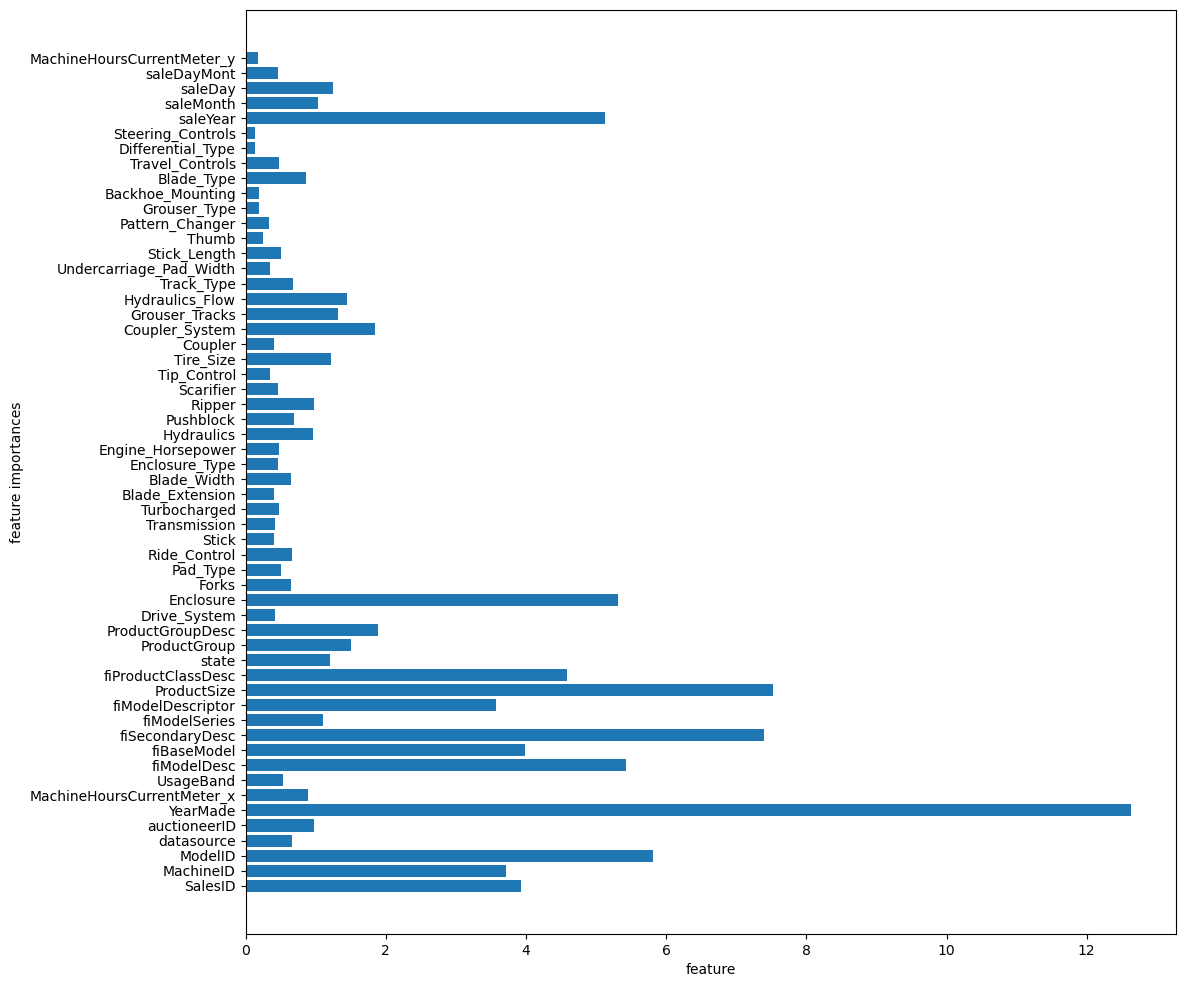

In [74]:
fig,sub=plt.subplots()
sub.barh(y=bulldozer_traing.drop("SalePrice",axis=1).columns,width=rfr.feature_importances_*100)
fig.set_figheight(12)
fig.set_figwidth(12)
sub.set_ylabel("feature importances")
sub.set_xlabel("feature")